1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в еонкретном регионе от времени,
Да

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
Да, если рассматривать изменение скорости во времени (динамику).

в) количество отказов компьютера,
Да, если отказы пишутся в лог, т.е. есть отметка времени сбоя.

г) число обращений в поликлинику по району,
Да, если рассматривается в динамике, например, число за каждый день.

д) координаты автобуса при движении по маршруту,
Да

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.
Да

2. вариант 1) Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.


2. вариант2) COVID19 EDA для любой страны кроме Китая с длиной ряда больше 50 дней ( можно обновить данные по ссылке).


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

                     DUQ_MW
Datetime                   
2005-12-31 01:00:00  1458.0
2005-12-31 02:00:00  1377.0
2005-12-31 03:00:00  1351.0
2005-12-31 04:00:00  1336.0
2005-12-31 05:00:00  1356.0
              DUQ_MW
count  119068.000000
mean     1658.820296
std       301.740640
min      1014.000000
25%      1444.000000
50%      1630.000000
75%      1819.000000
max      3054.000000
Пропуски 0


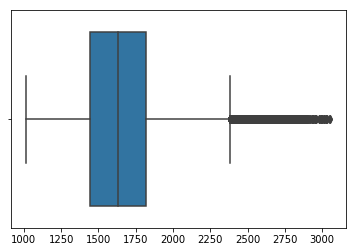

In [29]:
DUQ = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])
print(DUQ.head())
print(DUQ.describe())
sns.boxplot(DUQ.values)

print("Пропуски", DUQ['DUQ_MW'].isnull().sum())

In [145]:
print('Число уникальных значений:' , DUQ.index.nunique())

print('Несколько значений в одном периоде:\n', DUQ.index.value_counts().nlargest())



Число уникальных значений: 119064
Несколько значений в одном периоде:
 2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: Datetime, dtype: int64


In [151]:
DUQ_day

,DUQ_MW
Datetime,
2005-01-02,1363.170213
2005-01-09,1625.309524
2005-01-16,1634.101190
2005-01-23,1797.500000
2005-01-30,1768.107143
...,...
2018-07-08,1927.005952
2018-07-15,1922.363095
2018-07-22,1831.053571


Text(0,0.5,'МВт')

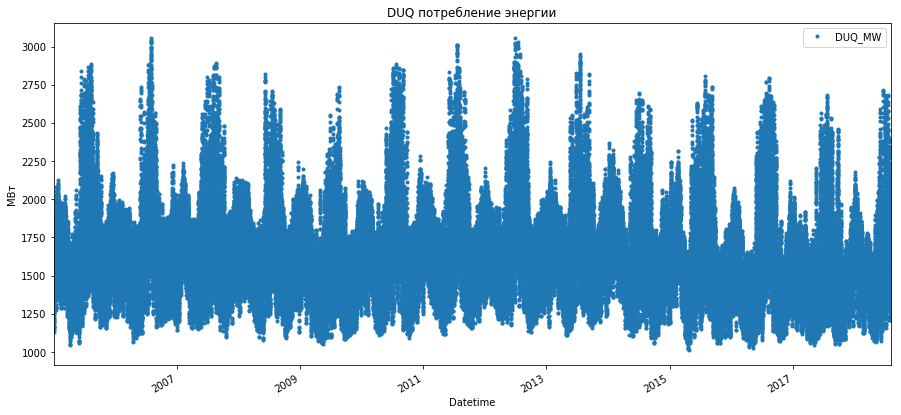

In [35]:
DUQ.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

Text(0,0.5,'МВт')

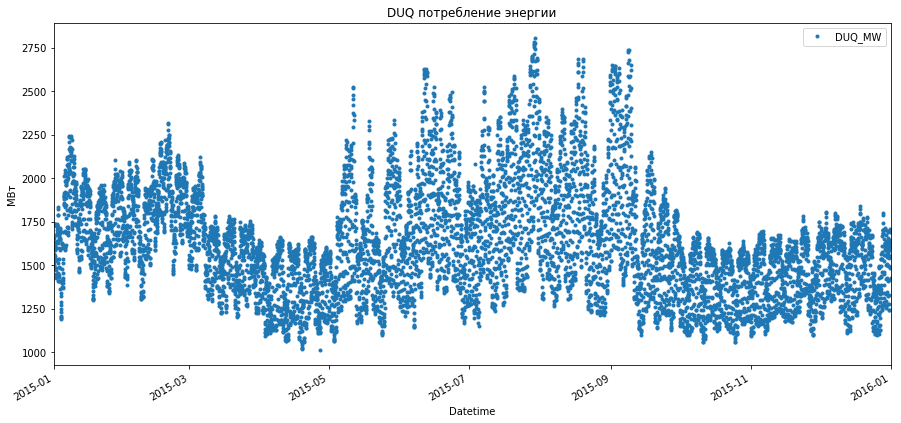

In [40]:
day_year=DUQ['2015-01-01 00:00:00':'2016-01-01 00:00:00']

day_year.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

Text(0,0.5,'МВт')

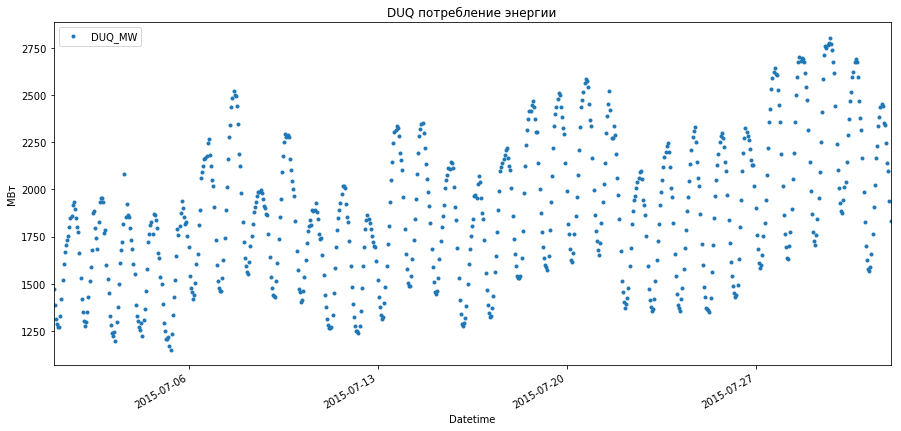

In [42]:
day_month=DUQ['2015-07-01 00:00:00':'2015-08-01 00:00:00']

day_month.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

In [49]:
DUQ['date'] = DUQ.index


In [51]:
DUQ_2015 = DUQ.loc[np.logical_and( np.logical_and( DUQ['date'].dt.year == 2015, DUQ['date'].dt.month == 7), DUQ['date'].dt.day > 20  )]


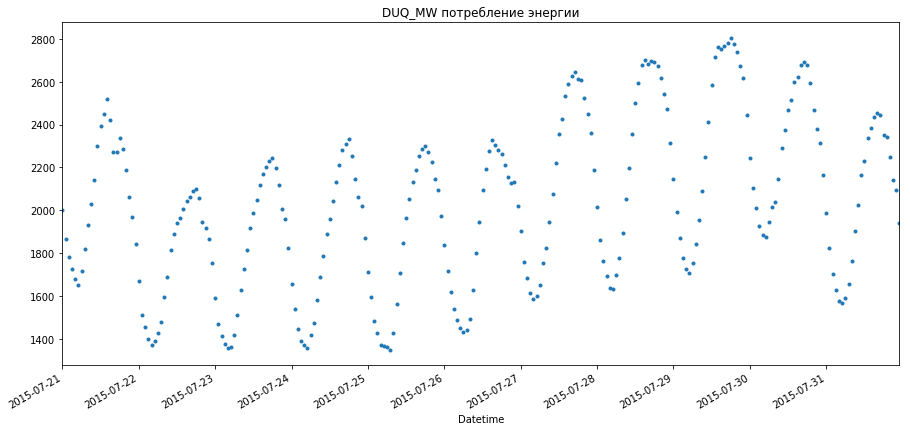

In [54]:
_ = DUQ_2015['DUQ_MW'].plot( style='.', figsize=( 15, 7 ), title='DUQ_MW потребление энергии' )

Данные без видимых аномалий. Периоды ритмичности: сутки, неделя. Видна сезонность: большой всплеск с мая по сентябрь, малый - январь, февраль.

In [ ]:
# import pandas_profiling

In [ ]:
# pandas_profiling.ProfileReport(DUQ)

3. вариант 1) Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам . Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent. (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )
3. вариант 2) Сделайте ресемплинг COVID19 на интервалы 3 дня, неделя, 2 недели.Постройте график изменения среднего по выборке и среднего отклонения по выборке на группах для интервалах 3 дня, неделя, 2 недели (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )


            Значение
Дата                
2019-09-01     58.84
2019-08-30     59.19
2019-08-29     60.37
2019-08-28     59.84
2019-08-27     59.59
...              ...
2010-09-10     78.41
2010-09-09     77.21
2010-09-08     77.93
2010-09-07     77.26
2010-09-06     76.87

[2662 rows x 1 columns]
          Значение
count  2667.000000
mean     81.533547
std      26.349469
min      27.850000
25%      56.840000
50%      77.710000
75%     108.190000
max     126.900000
Пропуски: Значение    0
dtype: int64


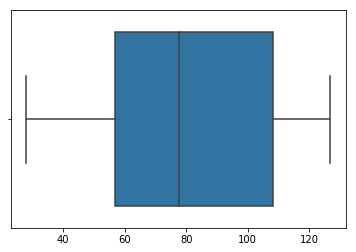

In [107]:
brent = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
print(brent.head(-5))
print(brent.describe())
sns.boxplot(brent.values)

print("Пропуски:", brent.isnull().sum())

In [108]:
brent.columns

Index(['Значение'], dtype='object')

Text(0.5,0,'t')

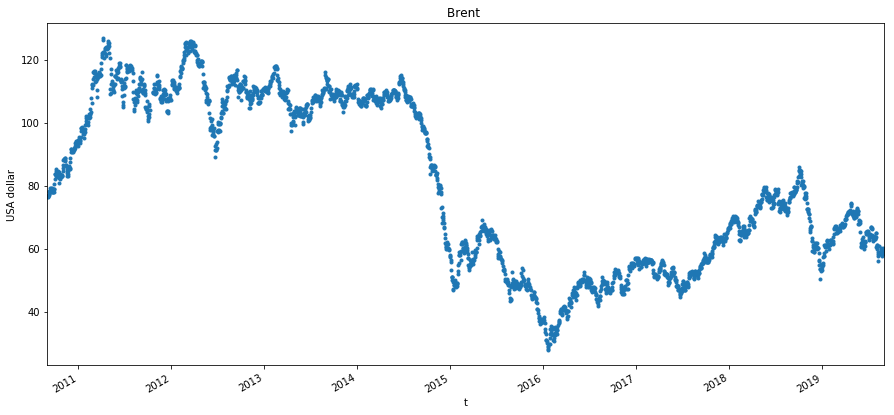

In [110]:
_ = brent['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [111]:
brent_2019=brent['2019']



In [112]:
brent_2019

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59
...,...
2019-01-07,57.57
2019-01-06,57.78
2019-01-04,57.42


Text(0,0.5,'usd')

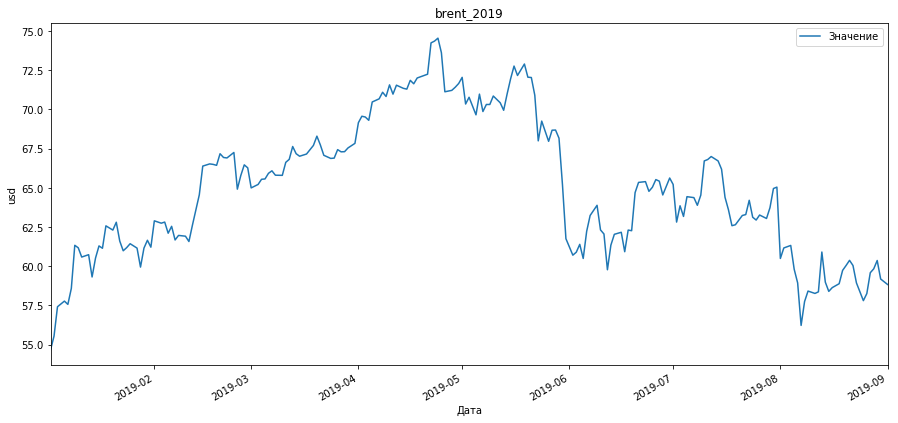

In [127]:
brent_2019.plot( kind='line', figsize = ( 15, 7 ), title = 'brent_2019' )
plt.ylabel ( 'usd' )

In [128]:
Compare_data = pd.DataFrame({'Energy':DUQ['DUQ_MW'].describe().values,'Brent':brent['Значение'].describe().values} )

Compare_data.index = DUQ['DUQ_MW'].describe().index

Compare_data

,Energy,Brent
count,119068.000000,2667.000000
mean,1658.820296,81.533547
std,301.740640,26.349469
min,1014.000000,27.850000
25%,1444.000000,56.840000
50%,1630.000000,77.710000
75%,1819.000000,108.190000
max,3054.000000,126.900000


вариант 1) Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам . Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent. (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

In [133]:
brent_w = brent.resample("W").mean()
brent_w

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667
...,...
2019-08-04,62.791667
2019-08-11,58.236667
2019-08-18,59.033333


In [134]:
brent_m = brent.resample("M").std()
brent_m

,Значение
Дата,
2010-09-30,1.294269
2010-10-31,0.898559
2010-11-30,1.753625
2010-12-31,1.443311
2011-01-31,1.842147
...,...
2019-05-31,2.387897
2019-06-30,1.874901
2019-07-31,1.373023


In [135]:
brent_y = brent.resample("Y").std()
brent_y

,Значение
Дата,
2010-12-31,5.269065
2011-12-31,7.021114
2012-12-31,7.777702
2013-12-31,4.014836
2014-12-31,14.512923
2015-12-31,7.925983
2016-12-31,6.795158
2017-12-31,4.876939
2018-12-31,6.866875


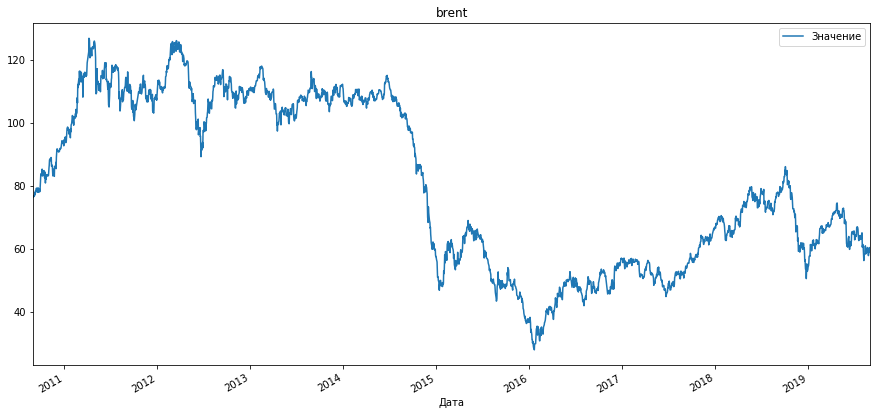

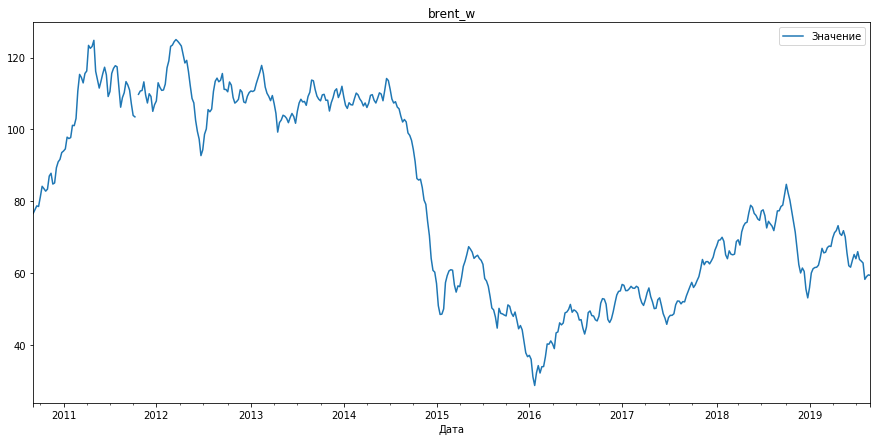

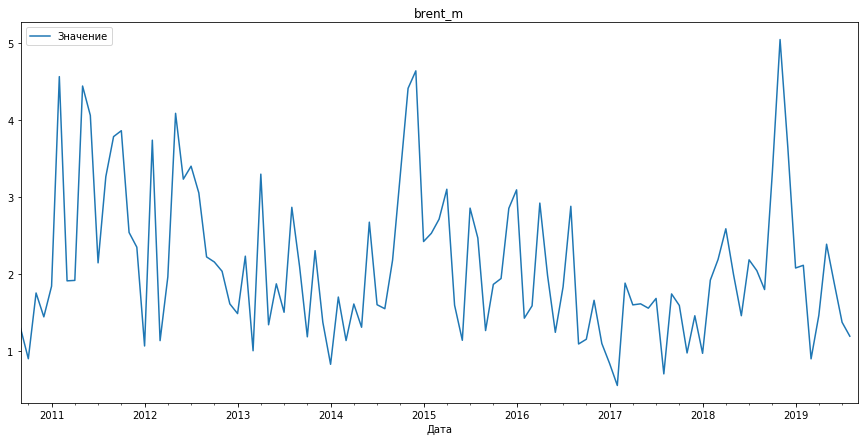

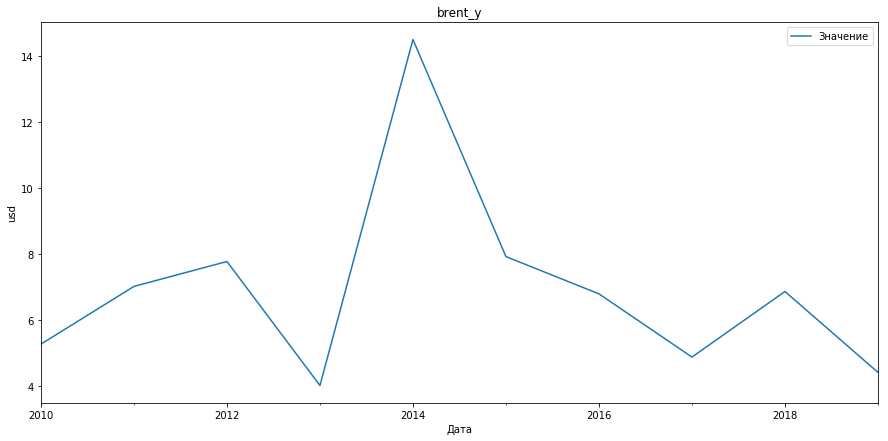

In [139]:

brent.plot( kind='line', figsize = ( 15, 7 ), title = 'brent' )
brent_w.plot( kind='line', figsize = ( 15, 7 ), title = 'brent_w' )
brent_m.plot( kind='line', figsize = ( 15, 7 ), title = 'brent_m' )
brent_y.plot( kind='line', figsize = ( 15, 7 ), title = 'brent_y' )
plt.ylabel ( 'usd' )
plt.show()


4. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

In [37]:
covid_704 = pd.read_csv('covid_19_data_7.04.csv', index_col=[0], parse_dates=[0])
covid_704.head()


,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
dateRep,,,,,,,,,
2020-07-04,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
2020-06-04,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
2020-05-04,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
2020-03-04,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0


In [36]:
print(covid_704.describe())
# sns.boxplot(covid_704.values)

print("\nПропуски", covid_704.isnull().sum())

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
dateRep,,,,,,,,,
2020-07-04,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
2020-06-04,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
2020-05-04,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
2020-03-04,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...
2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0


In [ ]:
DUQ.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

    ObservationDate Province/State  Country/Region      Last Update  \
SNo                                                                   
1        01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
2        01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
3        01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
4        01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
5        01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

     Confirmed  Deaths  Recovered  
SNo                                
1          1.0     0.0        0.0  
2         14.0     0.0        0.0  
3          6.0     0.0        0.0  
4          1.0     0.0        0.0  
5          0.0     0.0        0.0  
           Confirmed        Deaths     Recovered
count   12249.000000  12249.000000  12249.000000
mean     1315.721283     59.312515    344.905298
std      7771.564633    559.659824   3257.034698
min         0.000000      0.000000      0.000000
25%  

TypeError: cannot perform reduce with flexible type

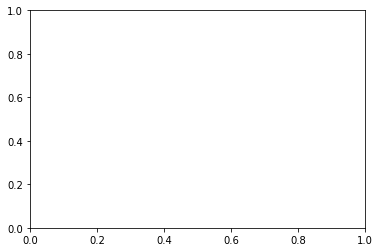

In [34]:
covid = pd.read_csv('covid_19_data.csv', index_col=[0], parse_dates=[0])
print(covid.head())
print(covid.describe())

sns.boxplot(covid.values)

print("\nПропуски", covid.isnull().sum())

In [ ]:
DUQ.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )